# **Importing libraries**

In [0]:
import cv2
import imutils
import numpy as np
import os
from google.colab.patches import cv2_imshow

# **Preprocessing**

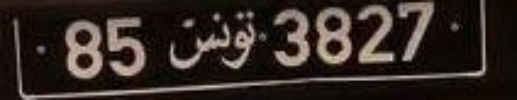

In [209]:
PATH = './pics'
PIC_NAME = '14.jpg'

img = cv2.imread(PATH+'/'+PIC_NAME)
(h, w, d) = img.shape
ratio = w/h
img = cv2.resize(img,(int(100*ratio),100))
# img = img[10:-10,10:-10]
(h, w, d) = img.shape
cv2_imshow(img)

**Adding perspective correction**

https://blog.ekbana.com/skew-correction-using-corner-detectors-and-homography-fda345e42e65

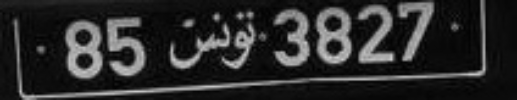

In [210]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

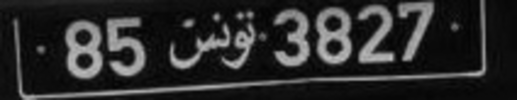

In [211]:
img = cv2.GaussianBlur(img, (3,3), 0)
cv2_imshow(img)

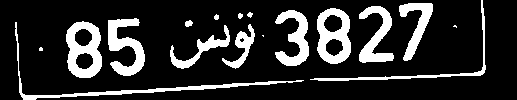

In [212]:
img2 = img.copy()
img2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(img2)

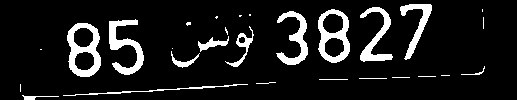

In [213]:
img2 = cv2.erode(img2, None, iterations=1)
cv2_imshow(img2)

# **Character segmentation**

6


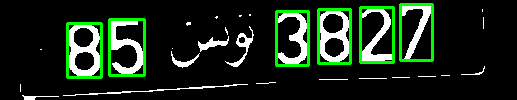

In [214]:
cnts = cv2.findContours(img2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []

img3 = img2.copy()
img3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)
i=0

for c in cnts:
  (cx, cy, cw, ch) = cv2.boundingRect(c)
  if ((cw >= w*0.05) and (cw <= w*0.5) and (ch >= h*0.5)):
    digitCnts.append(c)
    i+=1
    cv2.rectangle(img3, (cx,cy), (cx+cw,cy+ch), (0,255,0), 2)

print(i)
cv2_imshow(img3)